# Particle Swarm Optimization (PSO) Example

This notebook demonstrates the Particle Swarm Optimization algorithm using the `pypsoa` library. PSO is a population-based optimization technique inspired by the social behavior of birds flocking or fish schooling.

## Algorithm Overview

Particle Swarm Optimization works by:
1. **Initialization**: A swarm of particles is randomly distributed in the search space
2. **Evaluation**: Each particle's position is evaluated using a fitness function
3. **Update**: Particles move toward better positions based on:
   - Their own best position (cognitive component)
   - The swarm's best position (social component)
   - Current velocity (momentum)
4. **Iteration**: Steps 2-3 are repeated until convergence or maximum iterations

## Problem Setup

In this example, we'll optimize a simple 2D problem where particles try to find the minimum distance to a target point at coordinates (50, 50).

## Imports and Dependencies

First, let's import the required libraries:
- `matplotlib.pyplot`: For visualization
- `math`: For mathematical operations
- `random`: For random number generation
- `pypsoa`: Our PSO implementation with `Vector` and `Swarm` classes

In [1]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    raise ImportError("Please install matplotlib using 'pip install matplotlib'.")
import math
import random
from pypsoa import Vector, Swarm

## Algorithm Parameters

Let's configure the PSO algorithm parameters:

### Swarm Configuration
- `num_particles = 100`: Number of particles in the swarm
- `iterations = 20`: Maximum number of iterations

### PSO Coefficients
- `w = 0.5`: Inertia weight (controls momentum)
- `c1 = 1.0`: Cognitive coefficient (personal best influence)
- `c2 = 2.0`: Social coefficient (global best influence)
- `velocity_factor = 0.4`: Initial velocity scaling factor

### Search Space
- `x_bounds = (0, 100)`: X-axis boundaries
- `y_bounds = (0, 100)`: Y-axis boundaries
- `target = Vector(50, 50)`: Target point to find

### Fitness Function
We define a fitness function that calculates the Euclidean distance from a particle's position to the target. The goal is to minimize this distance.

In [2]:
# parameters
num_particles = 100
iterations = 20
w = 0.5
c1 = 1.0
c2 = 2.0
velocity_factor = 0.4
x_bounds = (0, 100)
y_bounds = (0, 100)
target = Vector(50, 50)
random.seed(42)


# define fitness function
def fit_func(pos: Vector):  # euclidean distance
    sub = pos - target
    return math.sqrt(math.pow(sub.x, 2) + math.pow(sub.y, 2))


# create swarm
swarm = Swarm.from_bounds(
    num_particles=num_particles,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    w=w,
    c1=c1,
    c2=c2,
    velocity_factor=velocity_factor,
)

# get initial xy values for evaluation
init_x_vals, init_y_vals = swarm.get_positions()

# run pso algorithm
for _ in range(iterations):
    swarm.step()
    swarm.eval(fit_func)

# get final xy values
final_x_vals, final_y_vals = swarm.get_positions()

## Algorithm Execution

The code above performs the following steps:

1. **Swarm Initialization**: Creates a swarm with particles randomly distributed within the specified bounds
2. **Position Recording**: Captures initial particle positions for visualization
3. **PSO Iteration**: For each iteration:
   - `swarm.step()`: Updates particle velocities and positions using PSO equations
   - `swarm.eval(fit_func)`: Evaluates fitness for all particles
4. **Final State**: Records final particle positions

### PSO Update Equations

The algorithm uses these equations to update each particle:

**Velocity Update:**
```
v(t+1) = w * v(t) + c1 * r1 * (pbest - x(t)) + c2 * r2 * (gbest - x(t))
```

**Position Update:**
```
x(t+1) = x(t) + v(t+1)
```

Where:
- `v(t)`: Current velocity
- `x(t)`: Current position
- `pbest`: Personal best position
- `gbest`: Global best position
- `r1, r2`: Random numbers between 0 and 1

## Visualization

Let's visualize the optimization process by comparing the initial and final particle positions:

- **Blue dots**: Particle positions
- **Red X**: Target point (50, 50)
- **Left plot**: Initial random distribution
- **Right plot**: Final converged positions

The visualization shows how particles converge toward the target point over the optimization iterations.

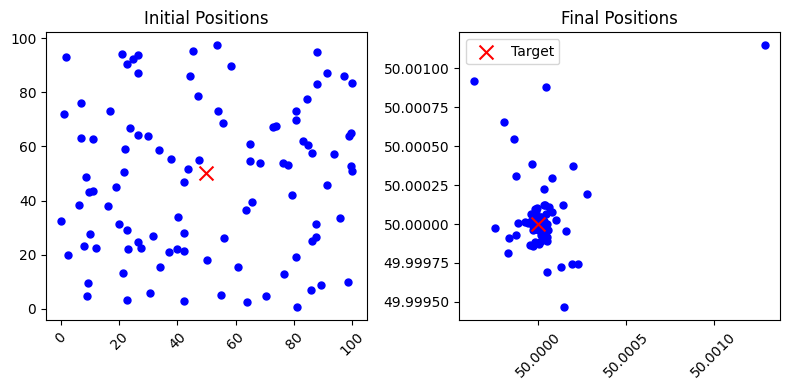

In [3]:
# plotting
_, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].scatter(init_x_vals, init_y_vals, 25, "b", "o")
axs[1].scatter(final_x_vals, final_y_vals, 25, "b", "o")
axs[0].scatter([target.x], [target.y], 100, "r", "x", label="Target")
axs[1].scatter([target.x], [target.y], 100, "r", "x", label="Target")
axs[0].set_title("Initial Positions")
axs[1].set_title("Final Positions")
axs[0].tick_params(axis="x", rotation=45)
axs[1].tick_params(axis="x", rotation=45)
axs[1].ticklabel_format(style='plain', useOffset=False, axis='both')
plt.legend()
plt.tight_layout()

## Results Analysis

### Expected Behavior

1. **Initial State**: Particles are randomly distributed across the 100x100 search space
2. **Convergence**: Over 20 iterations, particles should converge toward the target point (50, 50)
3. **Final State**: Most particles should be clustered around the target, with some variation due to the stochastic nature of the algorithm

### Key Observations

- **Exploration vs Exploitation**: The algorithm balances exploration (searching new areas) with exploitation (refining good solutions)
- **Swarm Intelligence**: Particles share information about good solutions through the global best position
- **Convergence**: The swarm typically converges to a region near the optimal solution

### Parameter Tuning Tips

- **Higher `c1`**: More emphasis on personal best (exploration)
- **Higher `c2`**: More emphasis on global best (exploitation)
- **Higher `w`**: More momentum, slower convergence
- **More particles**: Better coverage but slower computation
- **More iterations**: Better convergence but longer runtime

### Applications

PSO is widely used for:
- Function optimization
- Neural network training
- Parameter tuning
- Engineering design problems
- Financial modeling